# Load the libraries and the image we are going to use

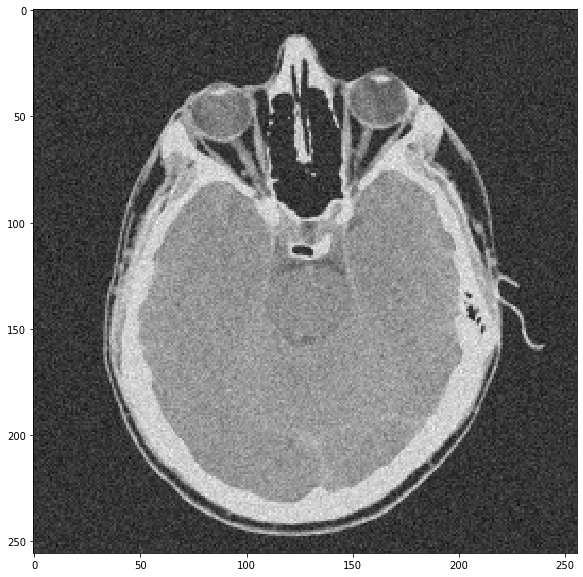

In [31]:
import cv2 
import numpy as np 
import random
from twoDDWT import *


%matplotlib inline 
from matplotlib import pyplot as plt
import pylab 
pylab.rcParams['figure.figsize'] = (10, 10) 

input_image=cv2.imread('Fig0726(a).tif',cv2.IMREAD_GRAYSCALE)
input_image = input_image.astype('float64')
plt.imshow(input_image,cmap='gray')

# Let's see the effects of differents filters


## Gaussian blurr

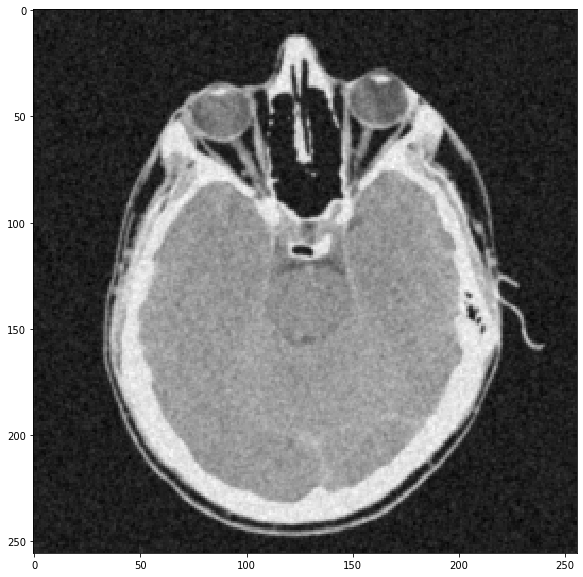

In [32]:
blurred_ = cv2.GaussianBlur(input_image,(0,0),sigmaX = 0.6)
plt.imshow(blurred_,cmap='gray')

## Discrete Wavelet Transform

In [27]:
def thresh_detail(transform_input,scale,thresh):
    transform = np.copy(transform_input)
    (l,c) = np.shape(transform)
    for i in range(scale):
        l = l//2
        c = c//2
            
    approx = np.copy(transform[:l,:c])
    transform[np.abs(transform)<thresh] = 0
    transform[:l,:c] = approx
    return transform

def max_detail(transform_input,scale):
    transform = np.copy(transform_input)
    (l,c) = np.shape(transform)
    for i in range(scale):
        l = l//2
        c = c//2
            
    transform[:l,:c] = np.zeros((l,c))
    return np.abs(transform).max()

26123.04687499997


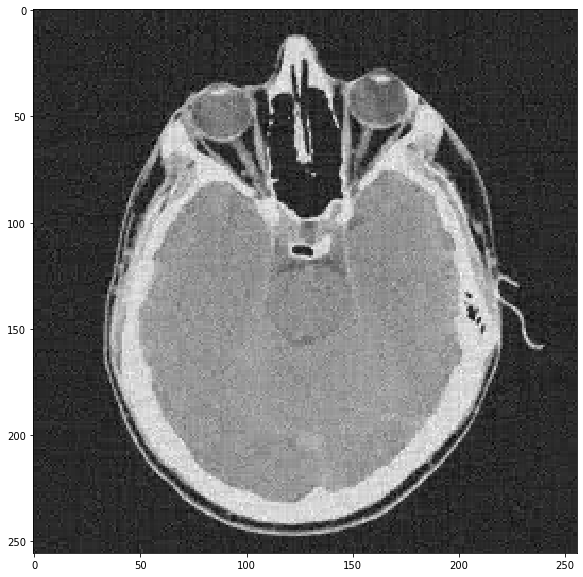

In [80]:
scale = 9
thresh = 20
transform = twoDDWT(input_image,scale)
print(max_detail(transform,scale))
transform_tresh = thresh_detail(transform,scale,thresh)
reconstruct = inverse_twoDDWT(transform_tresh,scale)
plot_transform(reconstruct,0)